In [1]:

import pandas as pd
from matplotlib import rc

import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('./train.csv')
data.head()

plt.rc("font", family="AppleGothic")
plt.rcParams['axes.unicode_minus'] = False


In [2]:
data['item'].value_counts()

item
TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: count, dtype: int64

In [3]:
data.isna().sum()

ID             0
timestamp      0
item           0
corporation    0
location       0
supply(kg)     0
price(원/kg)    0
dtype: int64

In [4]:
type(data['timestamp'][0])

str

In [5]:
import datetime

data['timestamp'] = pd.to_datetime(data['timestamp'])

# 날짜 --> week와 day column 생성 (day는 요일을 나타냄)

data['week'] = data['timestamp'].dt.isocalendar().week

data['day'] = data['timestamp'].dt.isocalendar().day

data['week'] = data['week'].apply(lambda x: x if x <= 52 else 1)

# Display the first few rows to verify the changes
data.tail(30)

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),week,day
59367,RD_F_J_20230202,2023-02-02,RD,F,J,571960.0,620.0,5,4
59368,RD_F_J_20230203,2023-02-03,RD,F,J,561980.0,562.0,5,5
59369,RD_F_J_20230204,2023-02-04,RD,F,J,506980.0,510.0,5,6
59370,RD_F_J_20230205,2023-02-05,RD,F,J,0.0,0.0,5,7
59371,RD_F_J_20230206,2023-02-06,RD,F,J,487380.0,407.0,6,1
59372,RD_F_J_20230207,2023-02-07,RD,F,J,594860.0,411.0,6,2
59373,RD_F_J_20230208,2023-02-08,RD,F,J,511900.0,406.0,6,3
59374,RD_F_J_20230209,2023-02-09,RD,F,J,415580.0,352.0,6,4
59375,RD_F_J_20230210,2023-02-10,RD,F,J,280740.0,393.0,6,5
59376,RD_F_J_20230211,2023-02-11,RD,F,J,192680.0,512.0,6,6


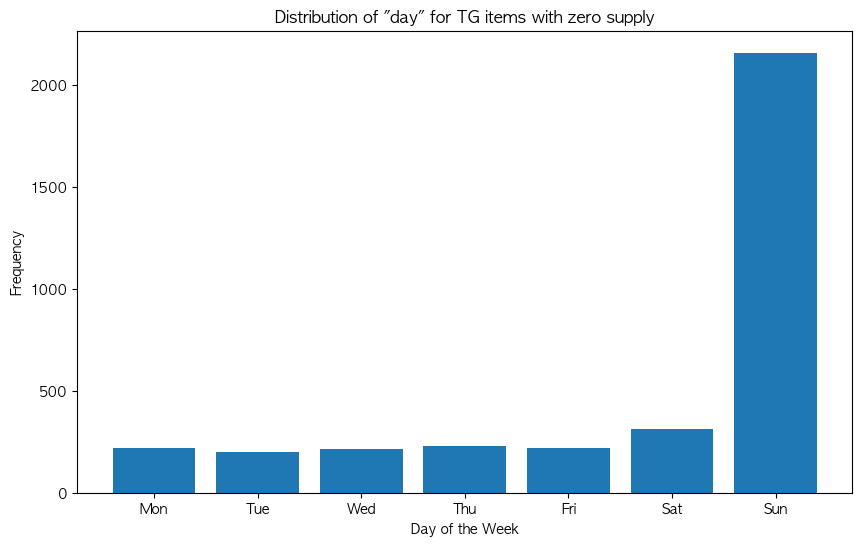

In [6]:
import matplotlib.pyplot as plt

# Filter the data for 'item' equals 'TG' and 'supply(kg)' equals 0.0
tg_supply_zero = data[(data['item'] == 'TG') & (data['supply(kg)'] == 0.0)]
bins = [i-0.5 for i in range(1, 9)]


# Plot the distribution of 'day' for the filtered data
plt.figure(figsize=(10,6))
tg_supply_zero['day'].hist(bins=bins, rwidth=0.8, align='mid')
plt.title('Distribution of "day" for TG items with zero supply')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(False)
plt.show()

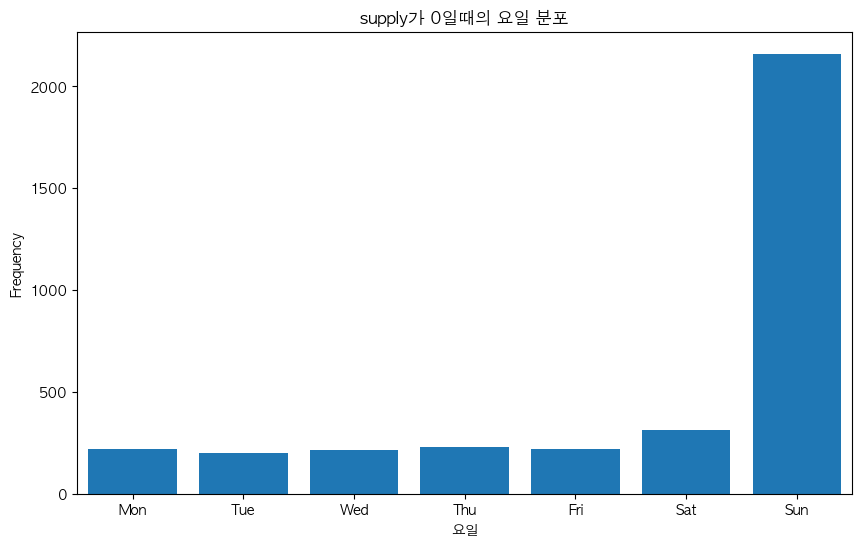

In [7]:
tg_supply_zero = data[(data['item'] == 'TG') & (data['supply(kg)'] == 0.0)]

bins = [i-0.5 for i in range(1, 9)]

plt.figure(figsize=(10,6))
tg_supply_zero['day'].hist(bins=bins, rwidth=0.8, align='mid')
plt.title('supply가 0일때의 요일 분포')
plt.xlabel('요일')
plt.ylabel('Frequency')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(False)
plt.xlim(0.5, 7.5)
plt.show()

In [8]:
data.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),week,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,1,2
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,1,3
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,1,4
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,1,5
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,1,6


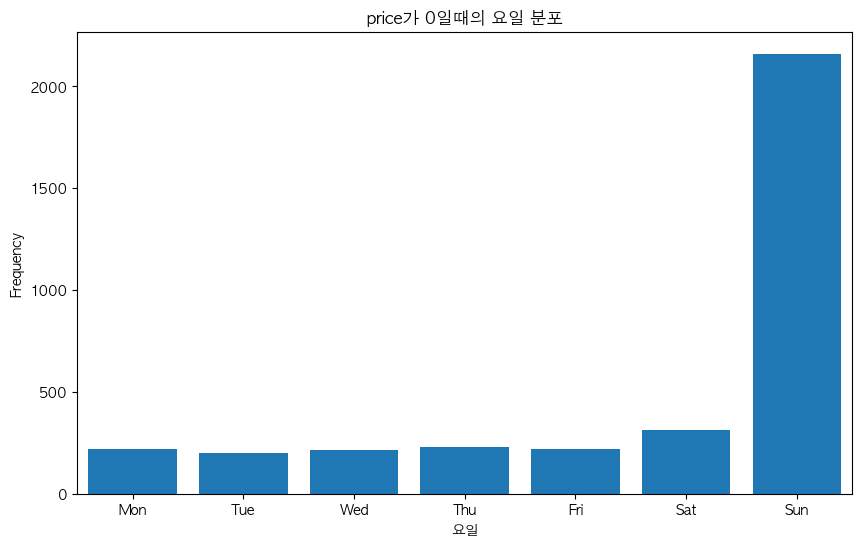

In [9]:
tg_price_zero = data[(data['item'] == 'TG') & (data['price(원/kg)'] == 0.0)]

bins = [i-0.5 for i in range(1, 9)]

plt.figure(figsize=(10,6))
tg_supply_zero['day'].hist(bins=bins, rwidth=0.8, align='mid')
plt.title('price가 0일때의 요일 분포')
plt.xlabel('요일')
plt.ylabel('Frequency')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(False)
plt.xlim(0.5, 7.5)
plt.show()

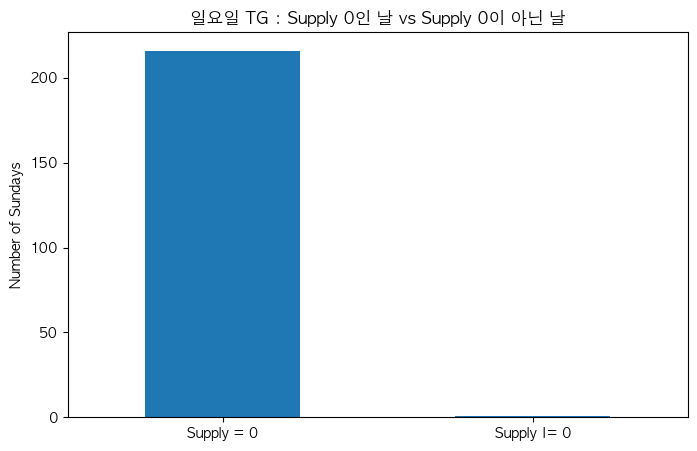

In [10]:
# Filter data for item "TG" and day 7 (Sunday)
tg_sunday_data = data[(data['item'] == 'TG') & (data['day'] == 7)]

# Further split the data into two datasets: one where supply is 0 and one where supply is not 0
tg_sunday_supply_zero = tg_sunday_data[tg_sunday_data['supply(kg)'] == 0]
tg_sunday_supply_nonzero = tg_sunday_data[tg_sunday_data['supply(kg)'] != 0]
sundays_with_zero_supply = tg_sunday_supply_zero['timestamp'].nunique()
sundays_with_nonzero_supply = tg_sunday_supply_nonzero['timestamp'].nunique()
sunday_supply_counts = pd.Series([sundays_with_zero_supply, sundays_with_nonzero_supply], index=['Supply = 0', 'Supply != 0'])
# We will create a histogram to visualize the distribution of supply for both cases

# Histogram for supply = 0
plt.figure(figsize=(8, 5))
sunday_supply_counts.plot(kind='bar')
plt.title('일요일 TG : Supply 0인 날 vs Supply 0이 아닌 날')
plt.ylabel('Number of Sundays')
plt.xticks(rotation=0)  # Keep the category names horizontal for better readability
plt.show()

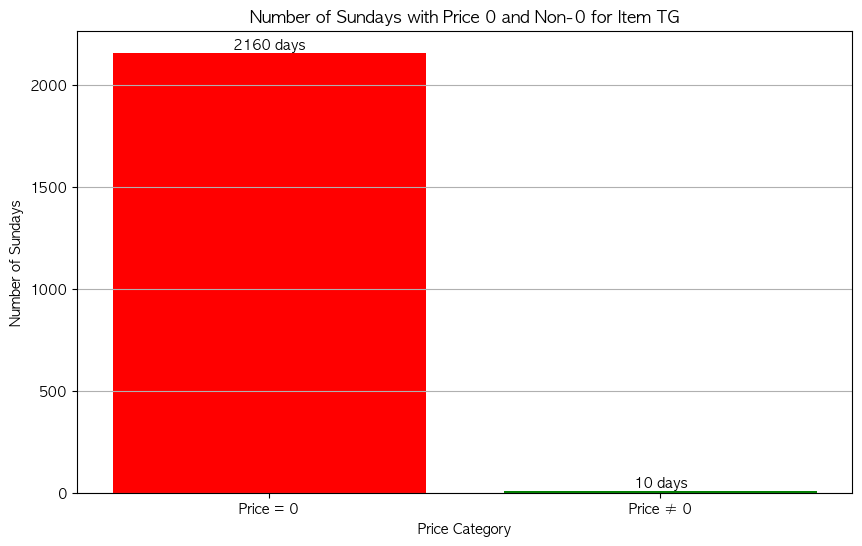

In [11]:
tg_sundays = data[(data['item'] == 'TG') & (data['day'] == 7)]

# Further filter for price equal to 0 and price not equal to 0
tg_sundays_price_zero = tg_sundays[tg_sundays['price(원/kg)'] == 0]
tg_sundays_price_nonzero = tg_sundays[tg_sundays['price(원/kg)'] != 0]

# Count the number of Sundays with price 0 and price not 0
num_price_zero = tg_sundays_price_zero.shape[0]
num_price_nonzero = tg_sundays_price_nonzero.shape[0]

plt.figure(figsize=(10, 6))

# Creating the bar locations
bar_locations = [1, 2]  # These are arbitrary locations for our two bars

# Creating the bars
plt.bar(bar_locations, [num_price_zero, num_price_nonzero], color=['red', 'green'])

plt.xlabel('Price Category')
plt.ylabel('Number of Sundays')
plt.title('Number of Sundays with Price 0 and Non-0 for Item TG')
plt.xticks(bar_locations, ['Price = 0', 'Price ≠ 0'])
plt.grid(axis='y')

# Adding the count above the bars
plt.text(1, num_price_zero, f'{num_price_zero} days', ha='center', va='bottom')
plt.text(2, num_price_nonzero, f'{num_price_nonzero} days', ha='center', va='bottom')

plt.show()

### Train 데이터 분포
> TG > BC > RD > CR > CB

> 결측치 없음

<Axes: xlabel='item', ylabel='price(원/kg)'>

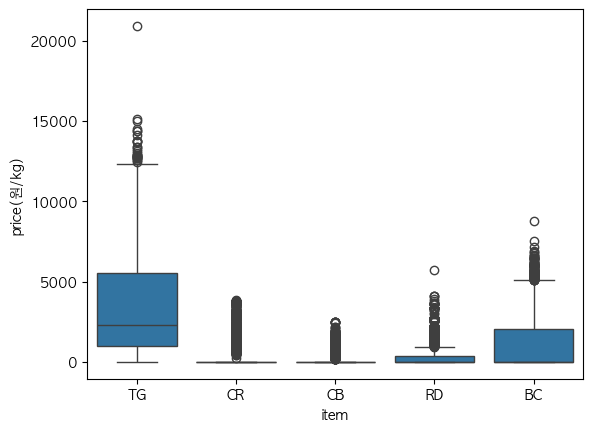

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='item',y='price(원/kg)',data=data)

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/63671761.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels([item_name])
/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/63671761.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels([item_name])
/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/63671761.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels([item_name])
/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/63671761.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels([item_name])
/var/folders

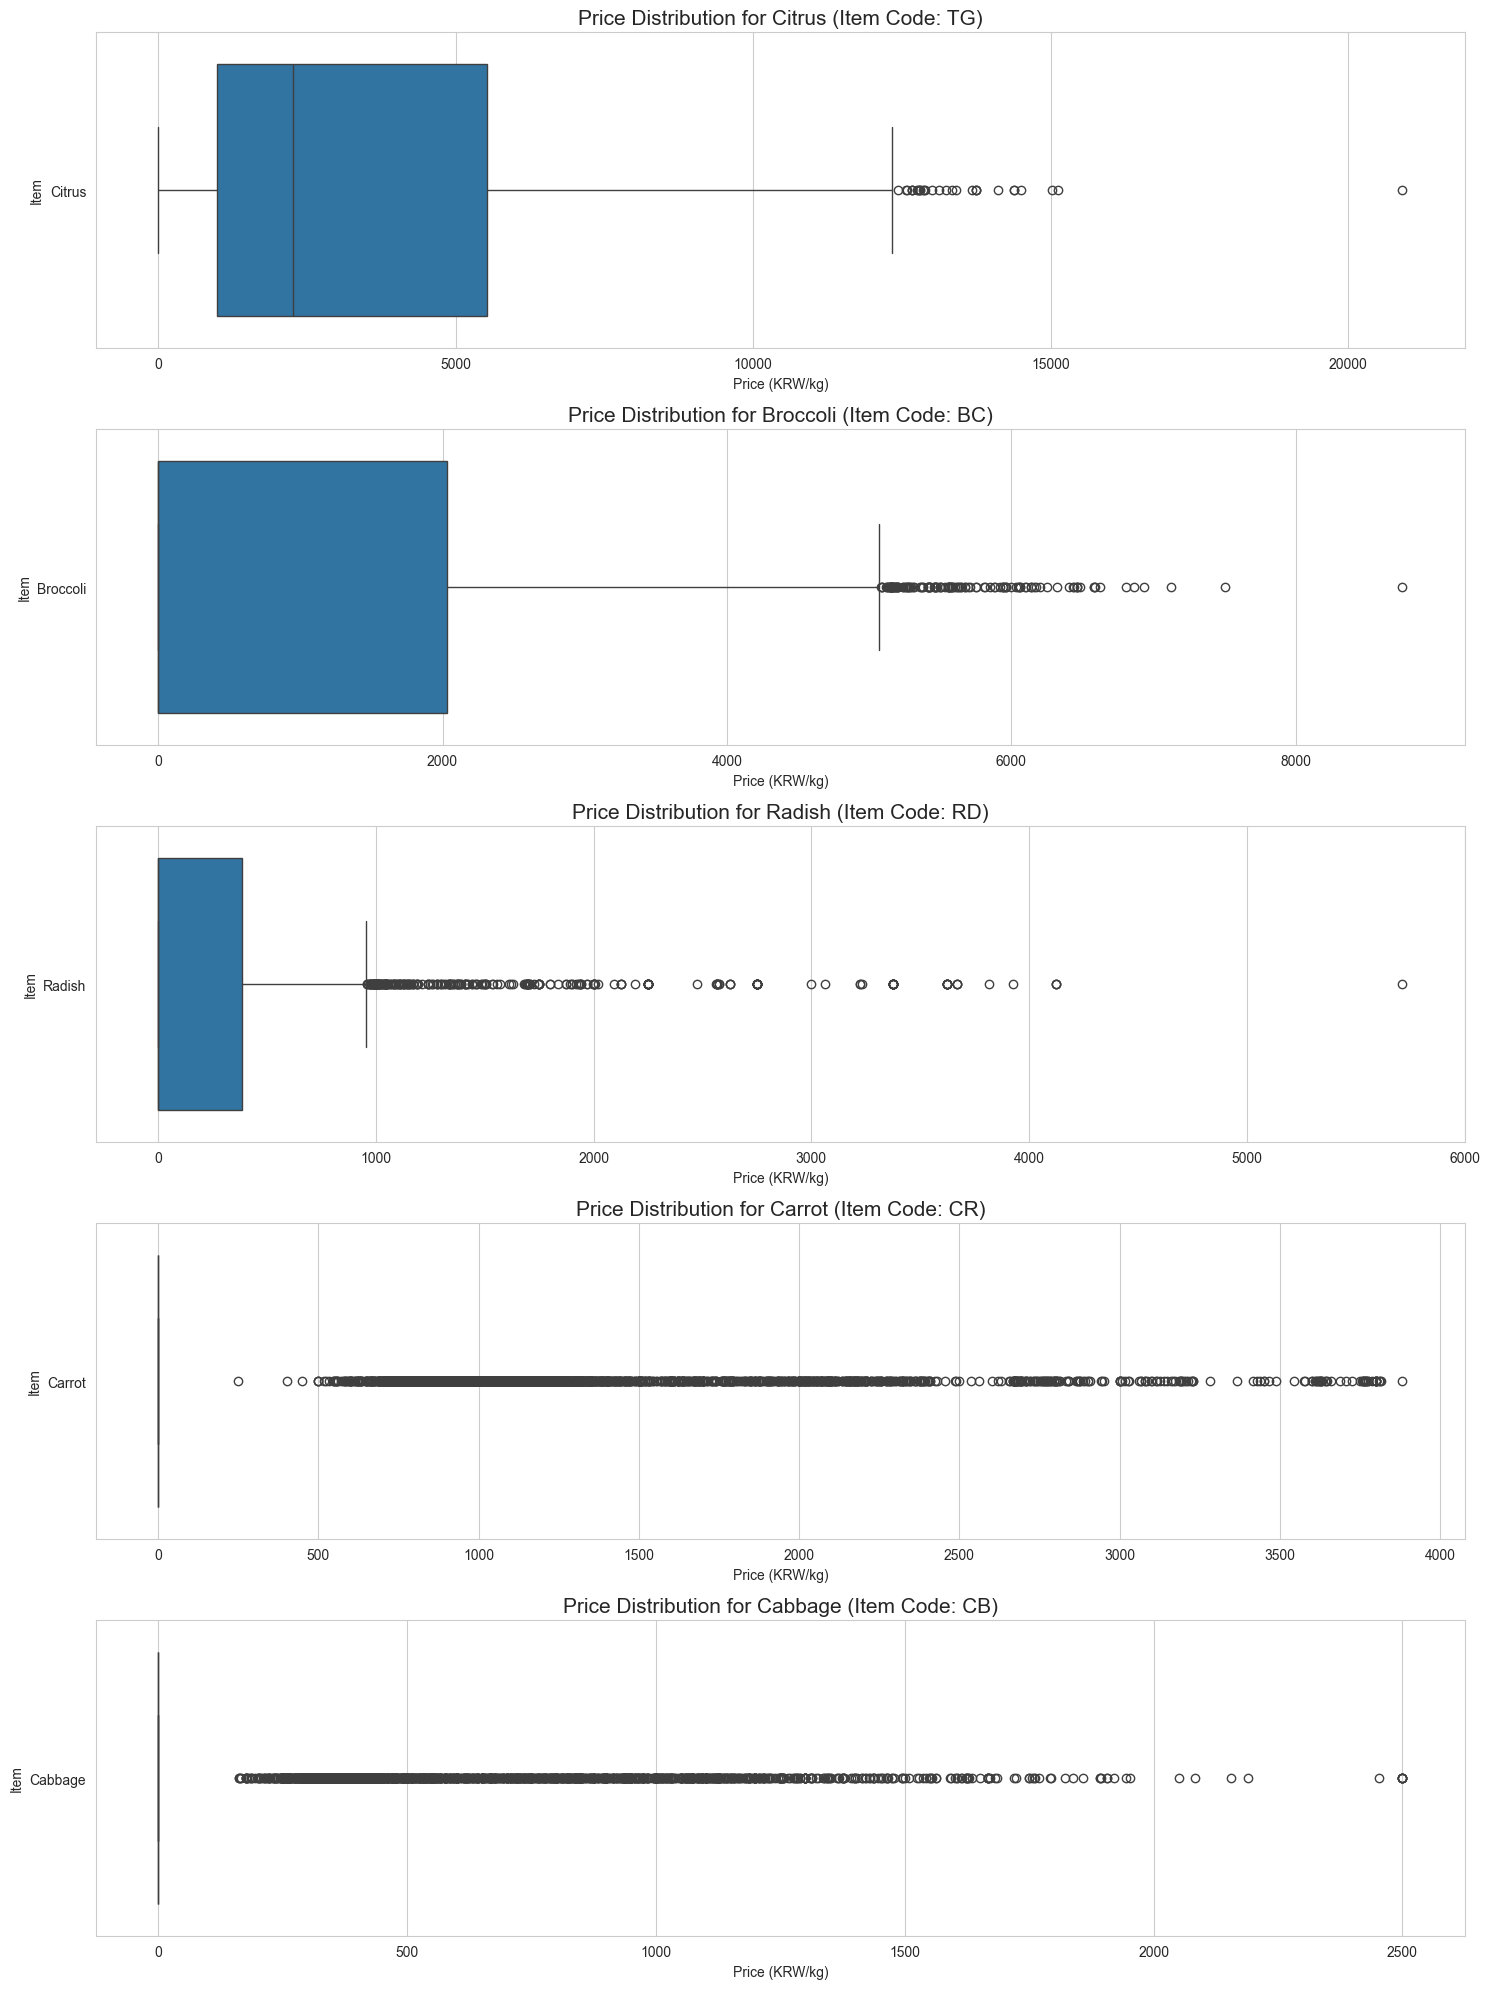

In [13]:

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# List of items we are interested in
items = {
    'TG': 'Citrus',
    'BC': 'Broccoli',
    'RD': 'Radish',
    'CR': 'Carrot',
    'CB': 'Cabbage'
}

# Initialize a figure with English labels to avoid the font issue
fig, axes = plt.subplots(nrows=len(items), ncols=1, figsize=(15, 20))

# Loop through each item and create a plot with English labels
for i, (item_code, item_name) in enumerate(items.items()):
    # Filter the dataset for the item
    item_data = data[data['item'] == item_code]
    # Create a boxplot with English labels
    sns.boxplot(x='price(원/kg)', y='item', data=item_data, orient='h', ax=axes[i])
    axes[i].set_title(f'Price Distribution for {item_name} (Item Code: {item_code})', fontsize=15)
    axes[i].set_xlabel('Price (KRW/kg)')
    axes[i].set_ylabel('Item')
    # Remove the y-axis label for clarity as we have titles
    axes[i].set_yticklabels([item_name])

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


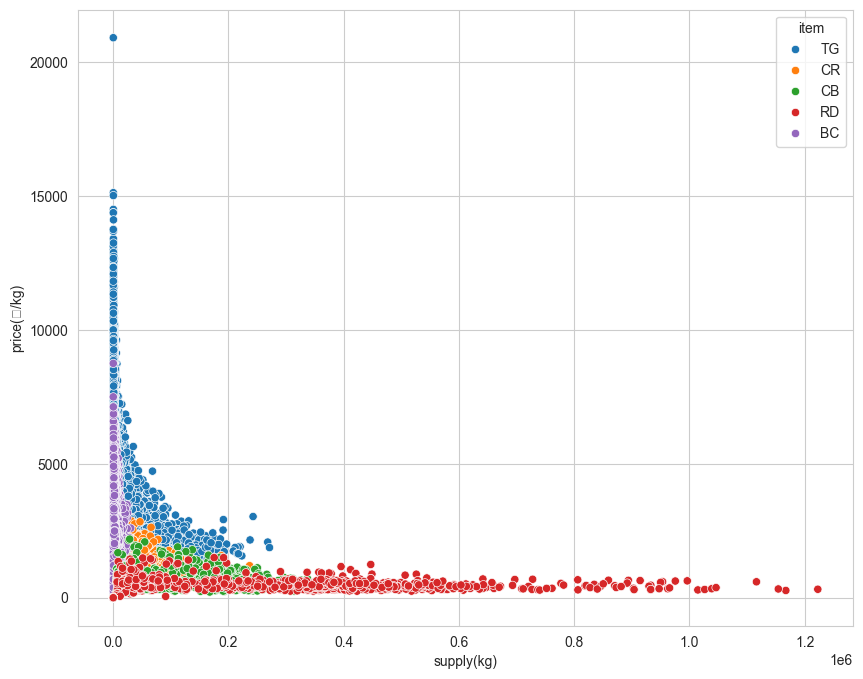

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x ='supply(kg)',y='price(원/kg)',hue='item')

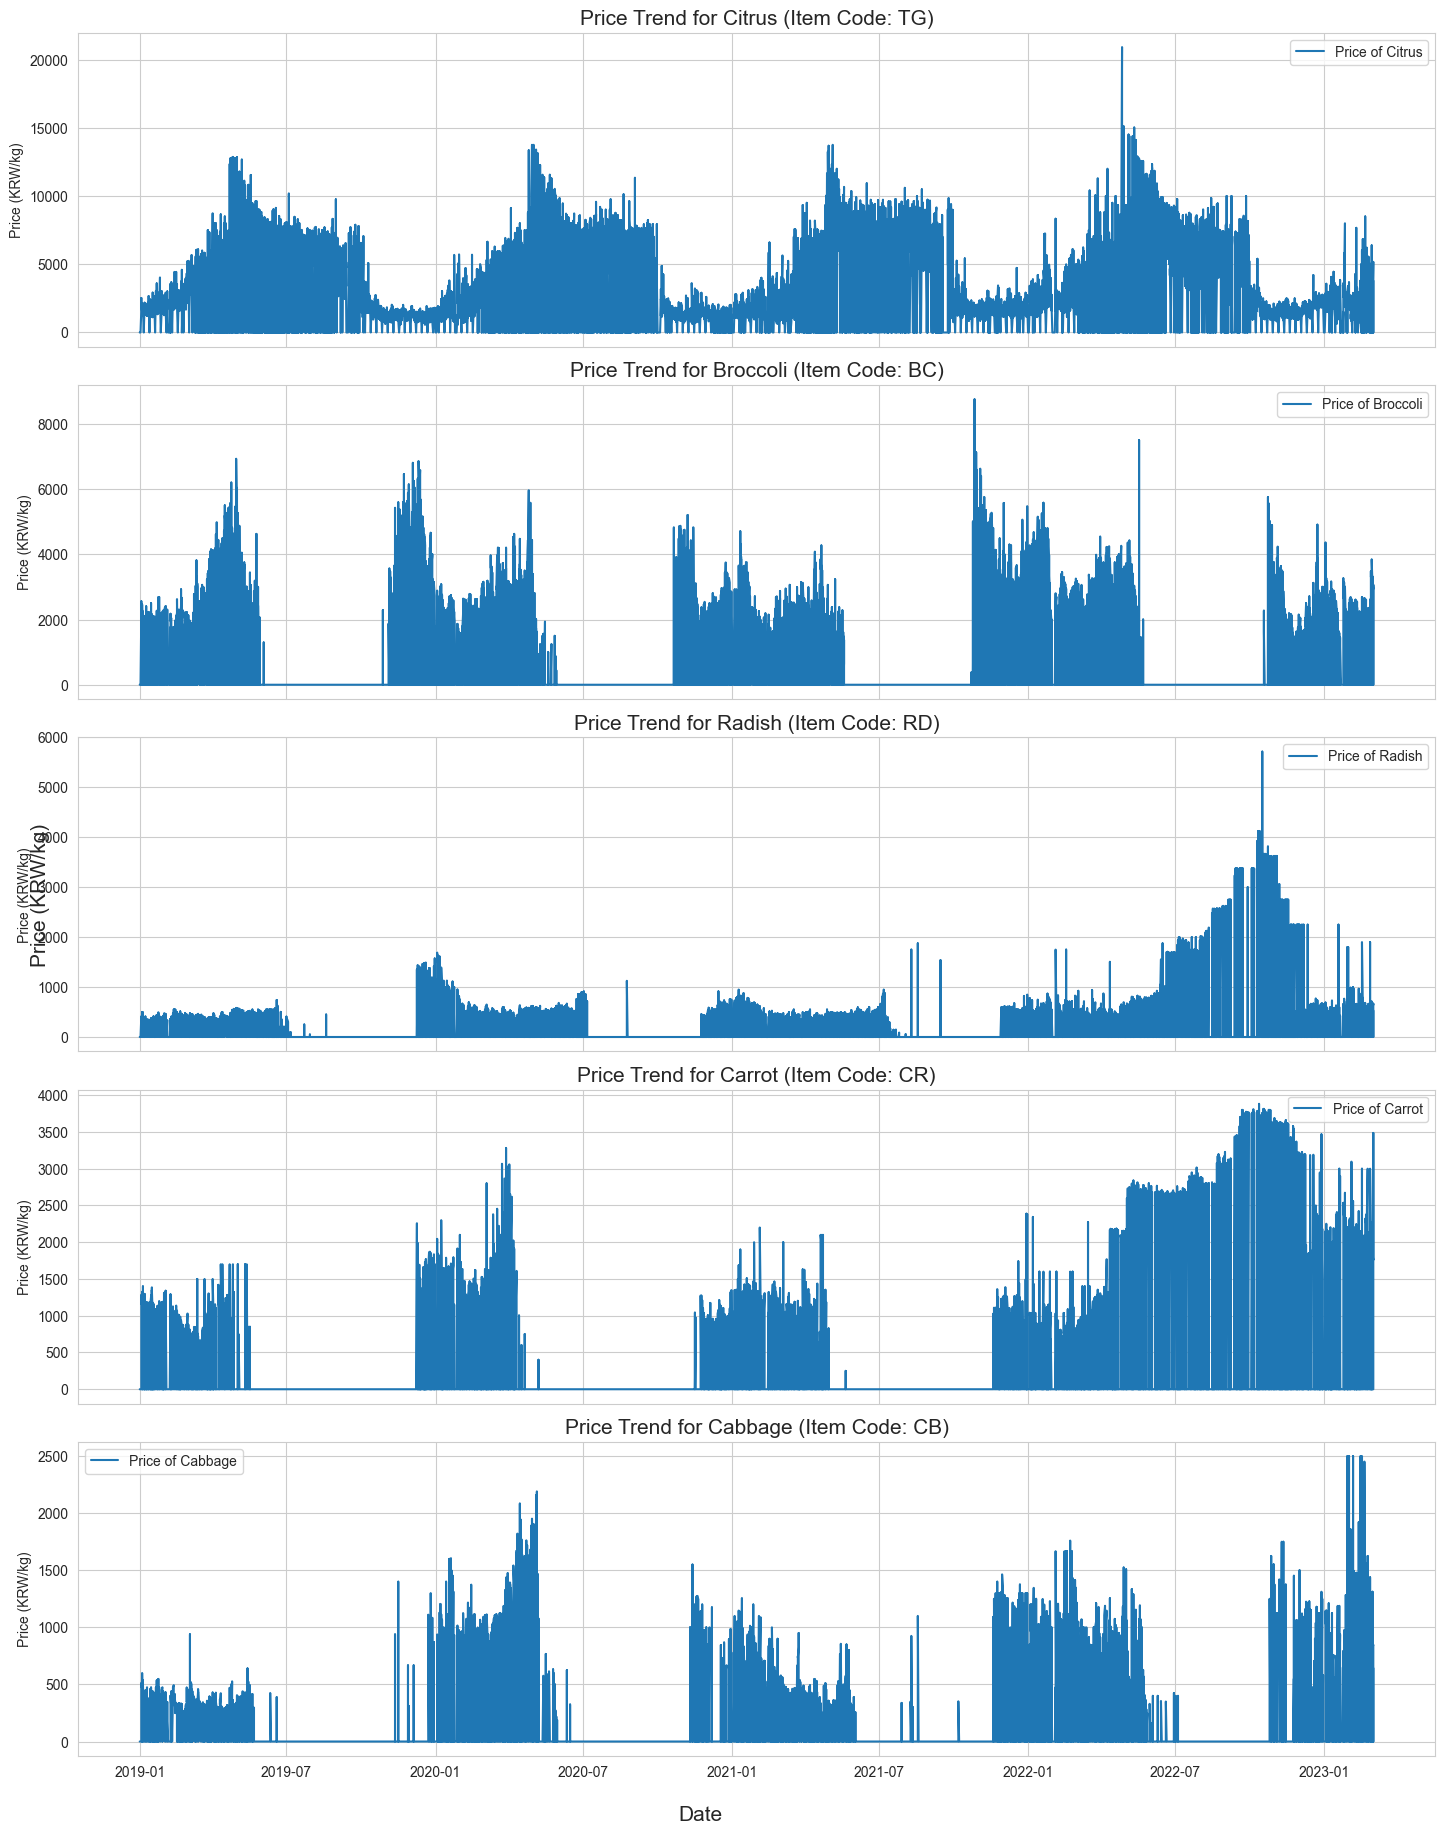

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# List of items we are interested in
items = {
    'TG': 'Citrus',
    'BC': 'Broccoli',
    'RD': 'Radish',
    'CR': 'Carrot',
    'CB': 'Cabbage'
}

# Initialize a figure
fig, axes = plt.subplots(nrows=len(items), ncols=1, figsize=(15, 20), sharex=True)

# Plotting price trends for each item
for i, (item_code, item_name) in enumerate(items.items()):
    # Filter the dataset for the item
    item_data = data[data['item'] == item_code]
    item_data = item_data.sort_values(by='timestamp')  # Sort by timestamp
    # Plot the price trend
    axes[i].plot(item_data['timestamp'], item_data['price(원/kg)'], label=f'Price of {item_name}')
    axes[i].set_title(f'Price Trend for {item_name} (Item Code: {item_code})', fontsize=15)
    axes[i].set_ylabel('Price (KRW/kg)')
    axes[i].legend()

# Set common labels
fig.text(0.5, 0.04, 'Date', ha='center', va='center', fontsize=15)
fig.text(0.06, 0.5, 'Price (KRW/kg)', ha='center', va='center', rotation='vertical', fontsize=15)

# Adjust layout
plt.tight_layout(rect=[0.03, 0.05, 1, 0.95])
plt.show()


In [16]:
filtered_data = data[data['price(원/kg)'] > 0]

# Group by item and corporation, then calculate the mean price for each group
average_price = filtered_data.groupby(['item', 'corporation'])['price(원/kg)'].mean().reset_index()

# Sort the results for better readability in the graph
average_price_sorted = average_price.sort_values(by=['item', 'corporation'])

average_price_sorted.head()

,item,corporation,price(원/kg)
0,BC,A,2950.844624
1,BC,B,2467.550654
2,BC,C,2442.658784
3,BC,D,2722.544228
4,BC,E,2852.381173


## 각 품목별 회사의 평균가격 비교(가격 0은 제거)

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3447159279.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corporation', y='price(원/kg)', data=item_data, palette='viridis')
/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3447159279.py:12: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


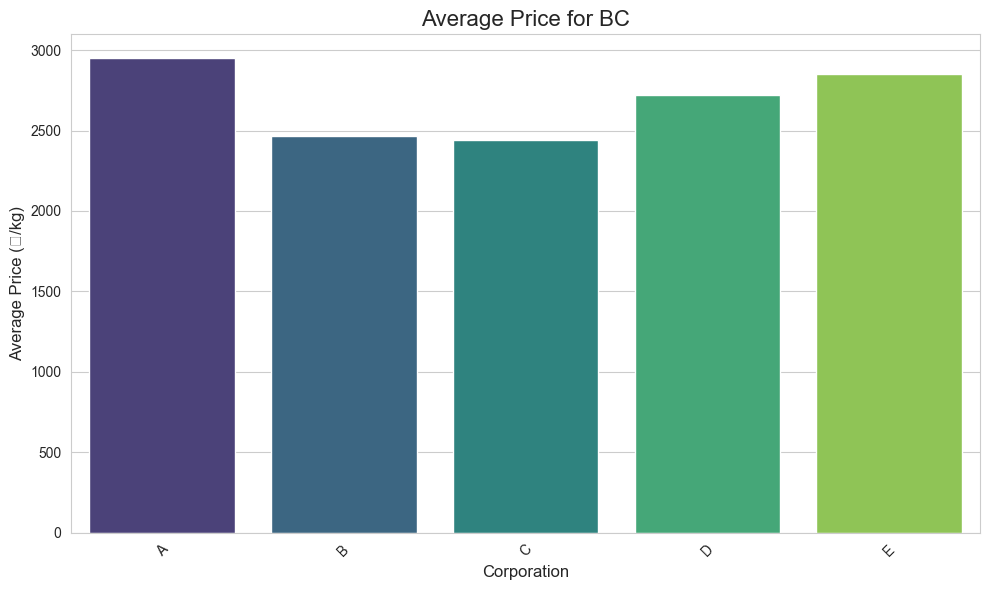

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3447159279.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corporation', y='price(원/kg)', data=item_data, palette='viridis')
/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3447159279.py:12: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


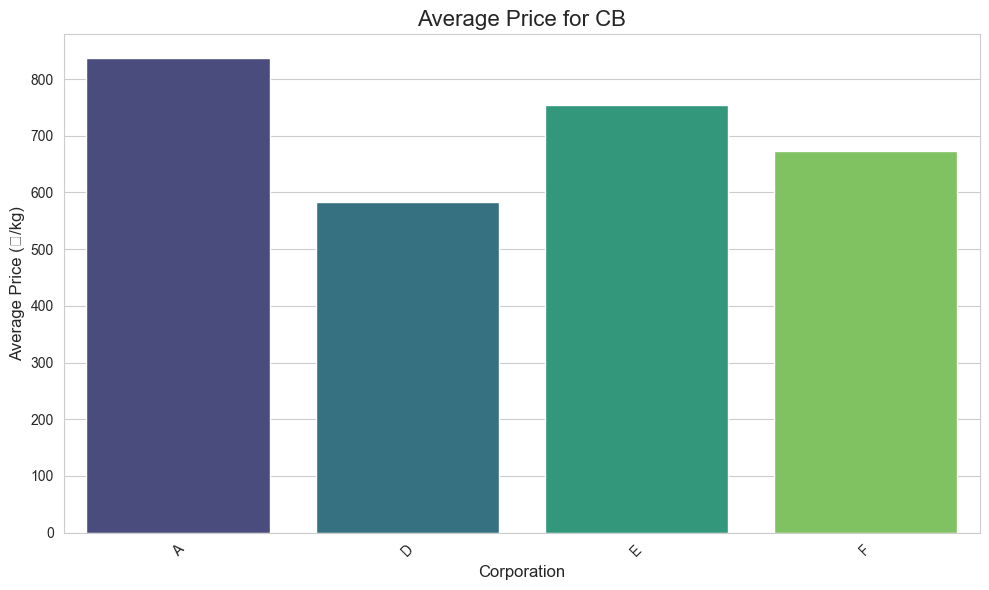

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3447159279.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corporation', y='price(원/kg)', data=item_data, palette='viridis')
/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3447159279.py:12: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


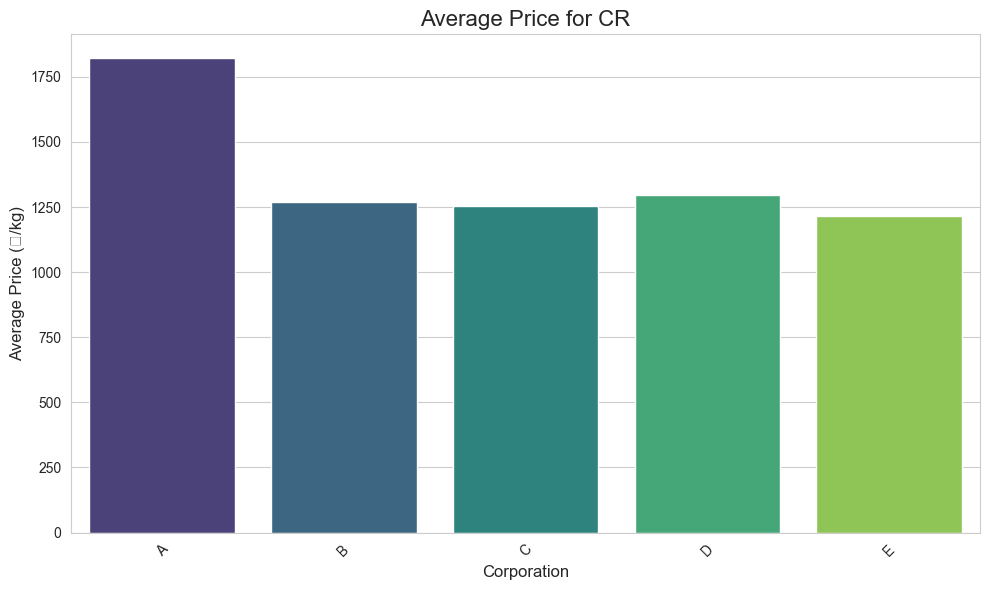

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3447159279.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corporation', y='price(원/kg)', data=item_data, palette='viridis')
/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3447159279.py:12: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


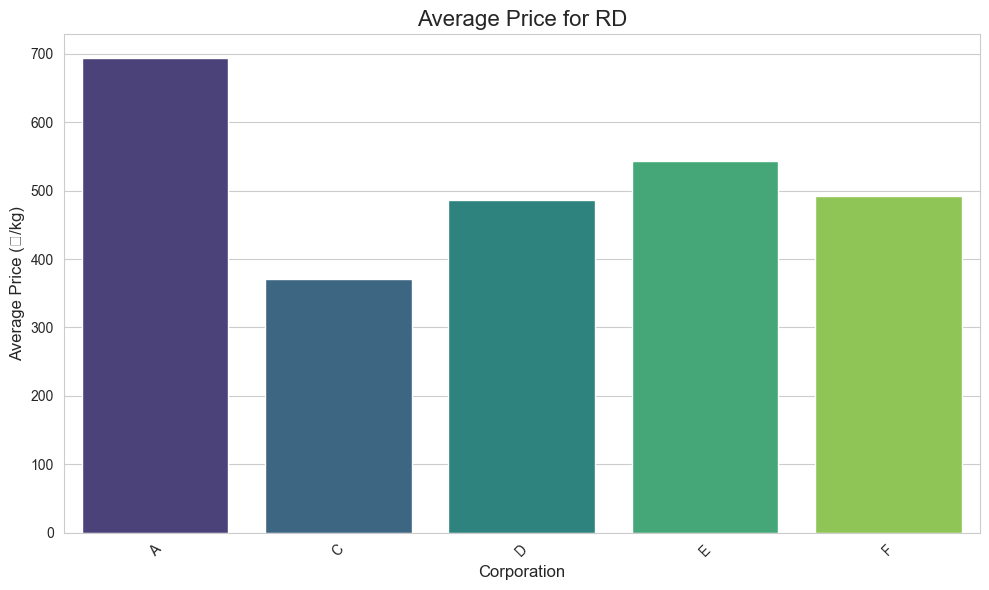

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3447159279.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corporation', y='price(원/kg)', data=item_data, palette='viridis')
/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3447159279.py:12: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


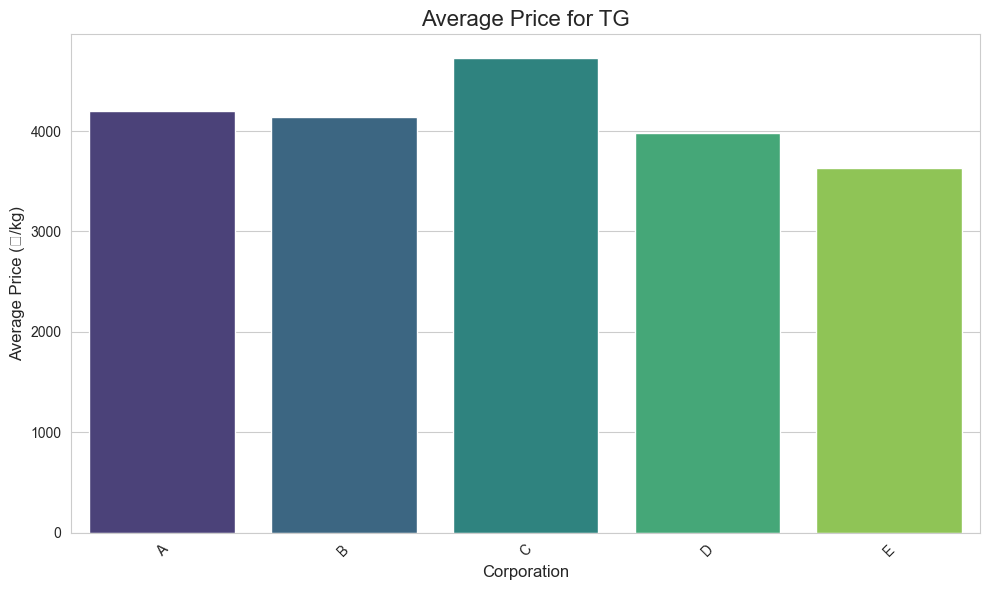

In [17]:
unique_items = average_price_sorted['item'].unique()

# Plot a separate graph for each item
for item in unique_items:  # Limit to first 5 items
    item_data = average_price_sorted[average_price_sorted['item'] == item]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='corporation', y='price(원/kg)', data=item_data, palette='viridis')
    plt.title(f'Average Price for {item}', fontsize=16)
    plt.xlabel('Corporation', fontsize=12)
    plt.ylabel('Average Price (원/kg)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### **TG 품목에서는 C 회사의 가격이 제일 높고, E 회사의 가격이 낮다.**

#### **A회사는 감귤(TG)품목을 제외한 나머지 네개 품목에서 가격이 제일 높았고, C회사는 감귤(TG)품목을 제외한 나머지 네개 품목에서 가격이 제일 낮은 그룹에 속했다.**

#### **감귤에서는 C회사의 가격이 제일 높다.**

#### ~~A회사가 감귤을 제외한 회사에서는 고급?이미지이고, C회사는 감귤 주력 회사아닐까?~~

In [18]:
# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract month from 'timestamp'
data['month'] = data['timestamp'].dt.month

# Filter out records with price equals to 0
data_filtered = data[data['price(원/kg)'] > 0]

# Group by item and month, then calculate the mean price for each group
monthly_average_price = data_filtered.groupby(['item', 'month'])['price(원/kg)'].mean().reset_index()

# Sort the results for better readability in the graph
monthly_average_price_sorted = monthly_average_price.sort_values(by=['item', 'month'])

# Check the first few rows of the dataframe
monthly_average_price_sorted.head()

,item,month,price(원/kg)
0,BC,1,2656.793689
1,BC,2,2179.598237
2,BC,3,2565.371429
3,BC,4,3184.791277
4,BC,5,2284.601896


## 각 품목별로, 월별 평균 가격

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/1215839717.py:13: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


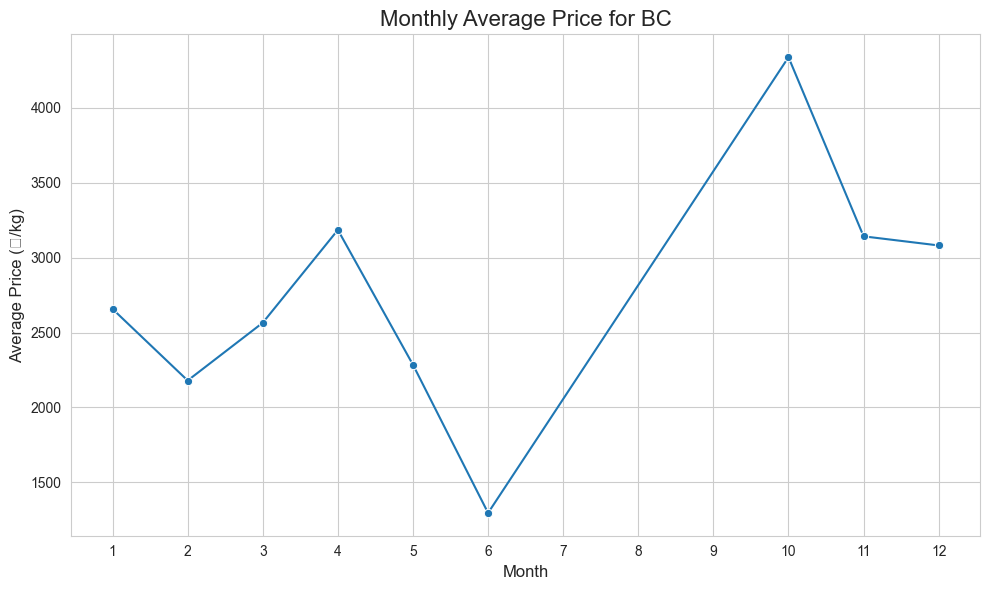

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/1215839717.py:13: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


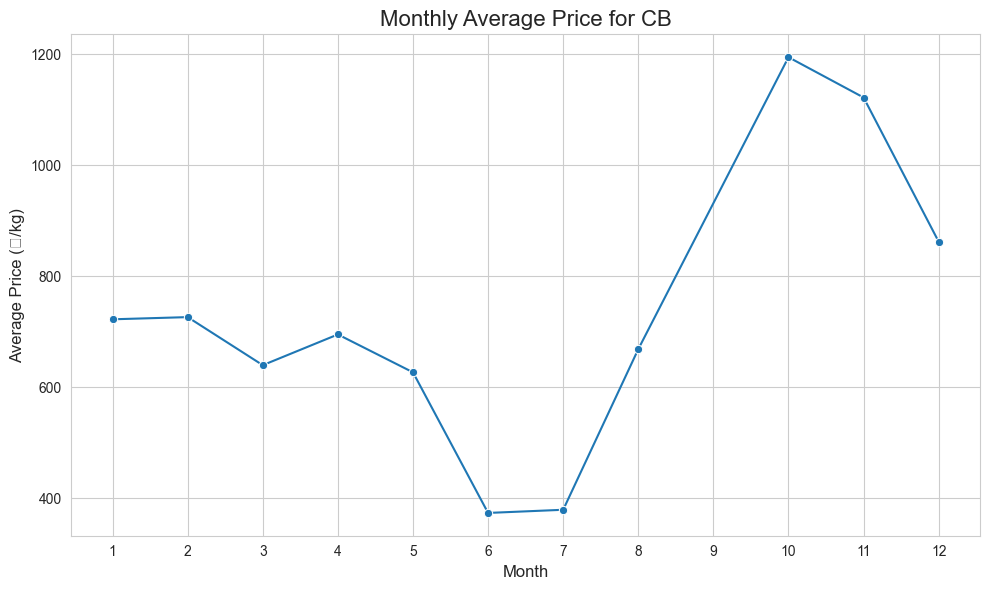

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/1215839717.py:13: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


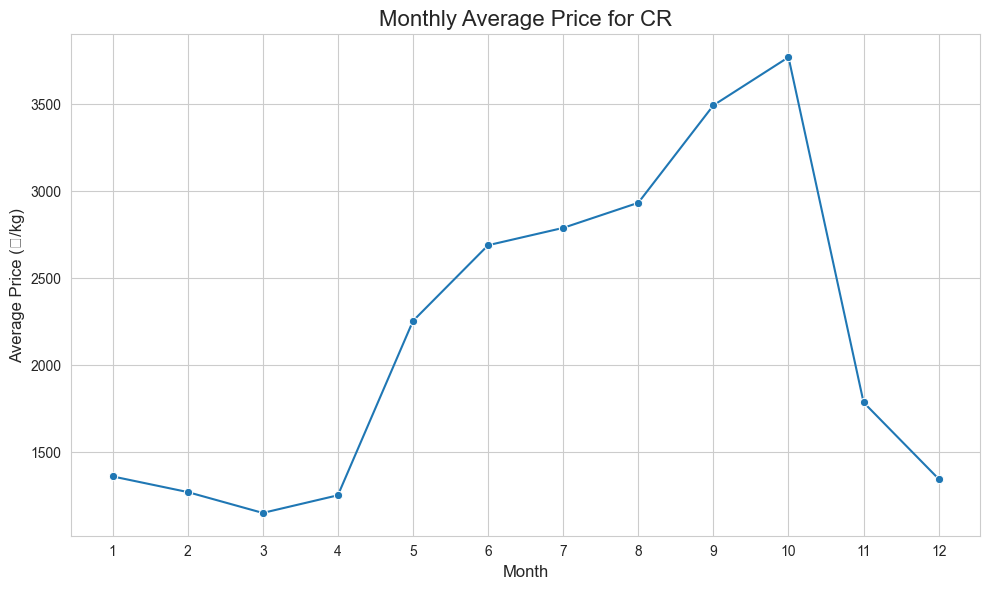

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/1215839717.py:13: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


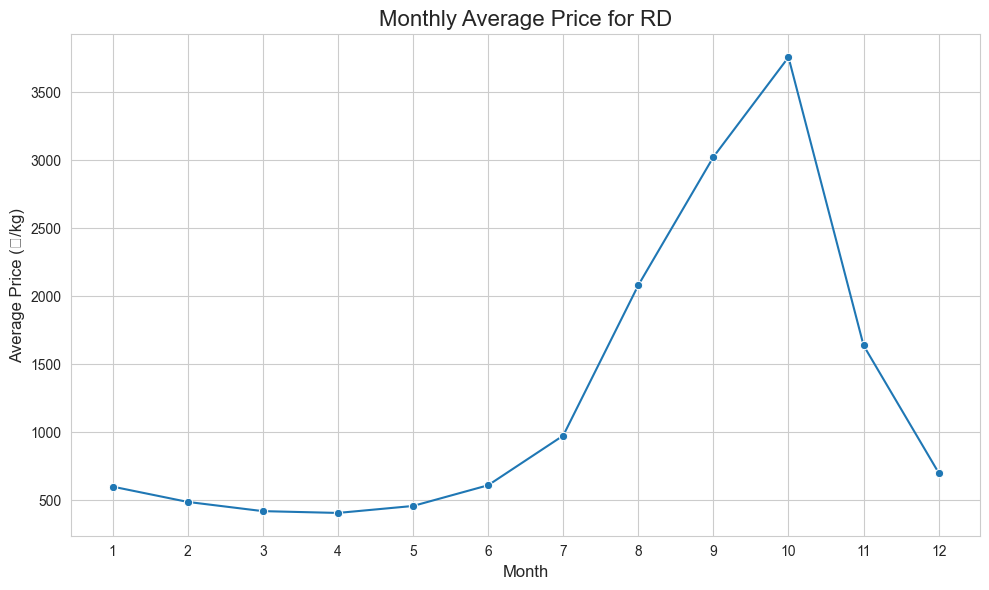

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/1215839717.py:13: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


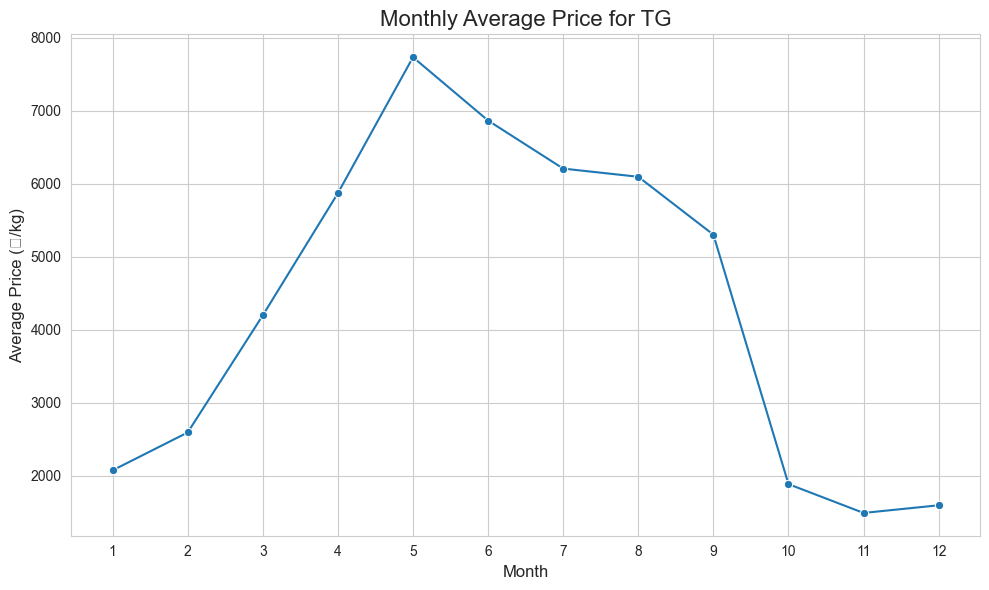

In [19]:
# Get unique items
unique_items = monthly_average_price_sorted['item'].unique()

# Plot a separate graph for each item
for item in unique_items:  # Plot for all items
    item_data = monthly_average_price_sorted[monthly_average_price_sorted['item'] == item]
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='month', y='price(원/kg)', data=item_data, marker='o')
    plt.title(f'Monthly Average Price for {item}', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Price (원/kg)', fontsize=12)
    plt.xticks(range(1, 13))  # Assuming there are 12 months in the dataset
    plt.tight_layout()
    plt.show()

#### 공급 평균과 판매가격 평균을 덧대어서 그려보자

## 각 품목별 판매가격 평균과 공급 평균

In [20]:
# Group by item and month, then calculate the mean supply for each group
monthly_average_supply = data_filtered.groupby(['item', 'month'])['supply(kg)'].mean().reset_index()

# Merge the average price and average supply dataframes on item and month
monthly_average_combined = pd.merge(monthly_average_price, monthly_average_supply, on=['item', 'month'])

# Sort the results for better readability in the graph
monthly_average_combined_sorted = monthly_average_combined.sort_values(by=['item', 'month'])

# Check the first few rows of the dataframe
monthly_average_combined_sorted.head()

,item,month,price(원/kg),supply(kg)
0,BC,1,2656.793689,4602.838228
1,BC,2,2179.598237,4225.979849
2,BC,3,2565.371429,2951.060390
3,BC,4,3184.791277,2341.705607
4,BC,5,2284.601896,555.526066


/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3233029842.py:30: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


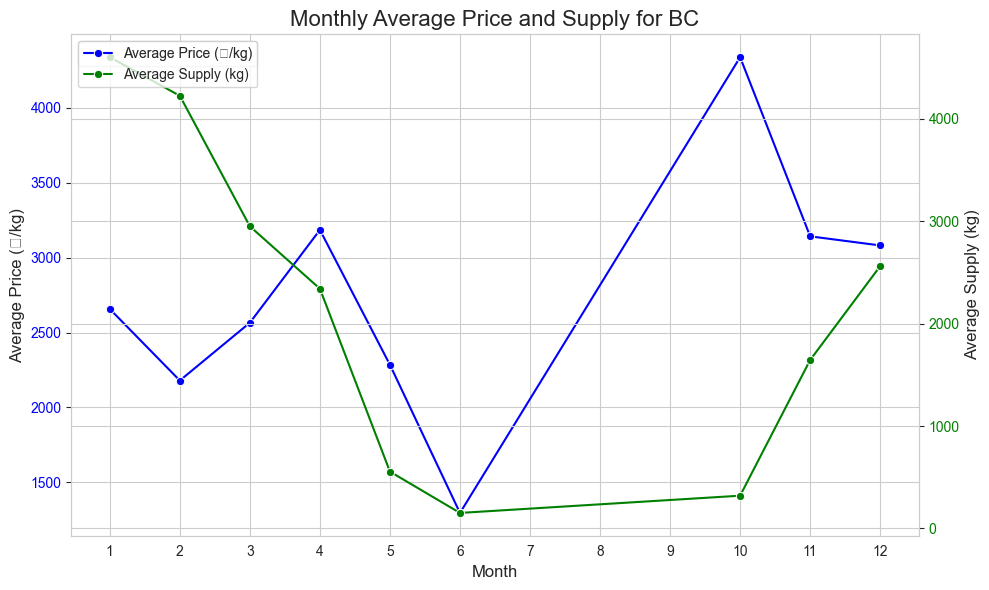

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3233029842.py:30: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


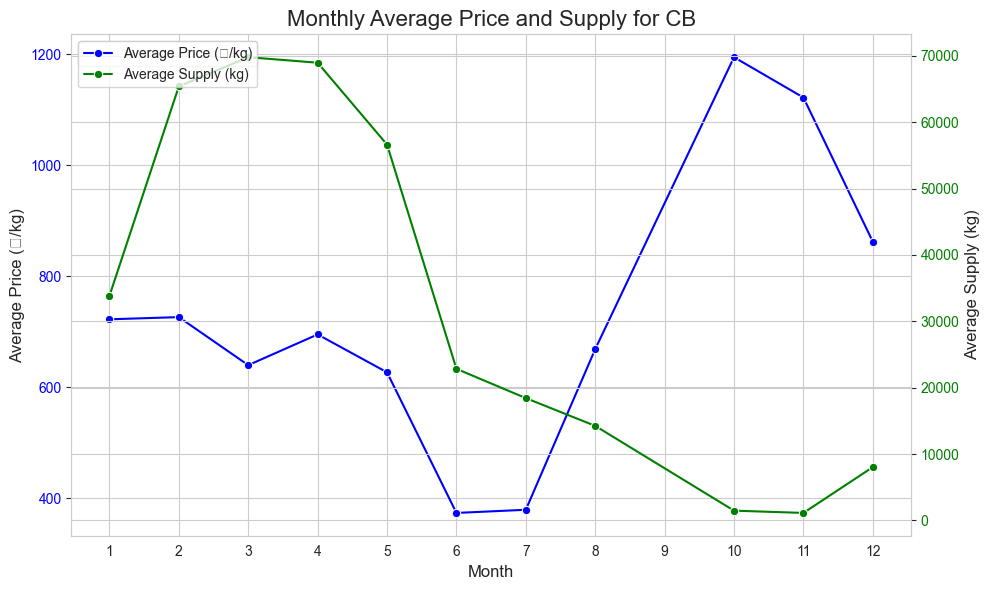

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3233029842.py:30: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


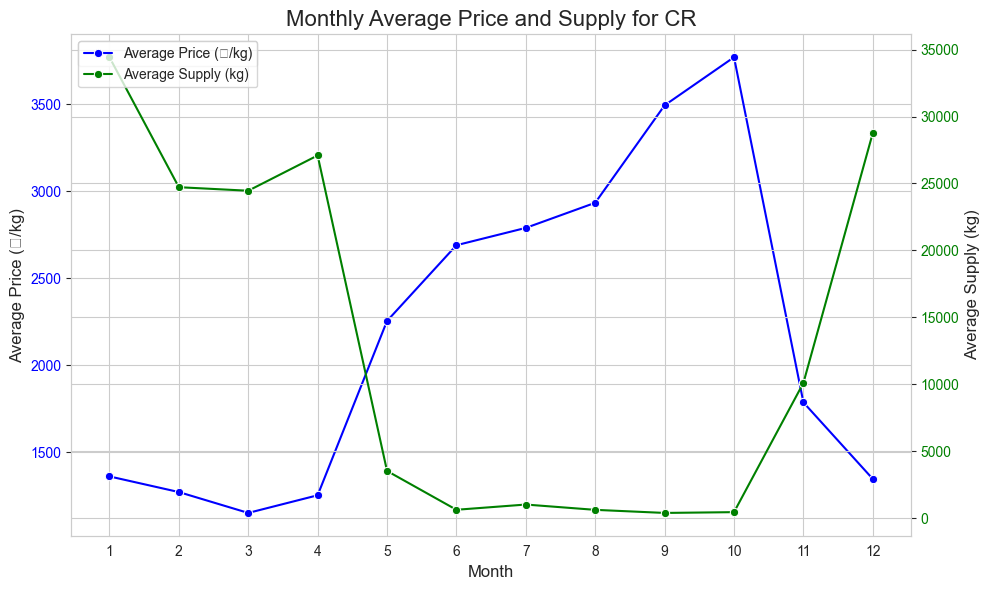

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3233029842.py:30: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


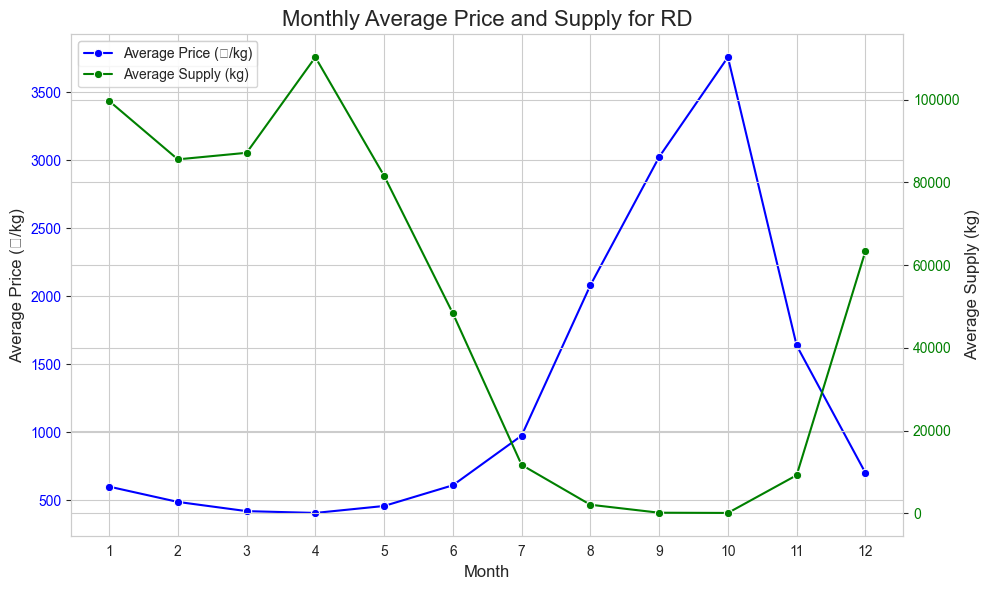

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_1421/3233029842.py:30: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/Users/seungwoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


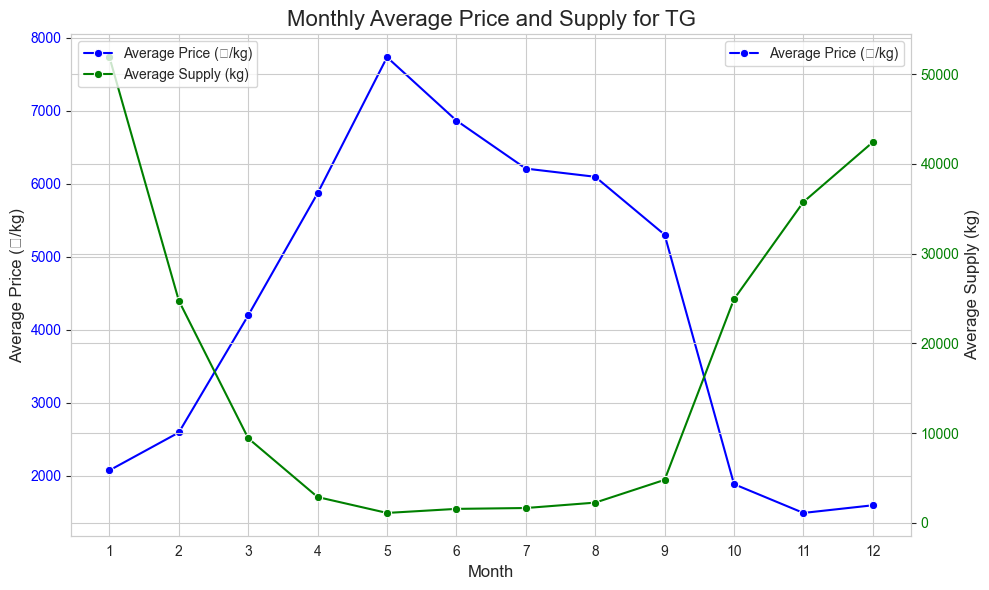

In [21]:
# Plot a separate graph for each item with dual y-axes for price and supply
for item in unique_items:  # Plot for all items
    item_data = monthly_average_combined_sorted[monthly_average_combined_sorted['item'] == item]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot average price
    sns.lineplot(x='month', y='price(원/kg)', data=item_data, marker='o', ax=ax1, color='b', label='Average Price (원/kg)')
    ax1.set_xlabel('Month', fontsize=12)
    ax1.set_ylabel('Average Price (원/kg)', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='b')
    
    # Create a second y-axis for average supply
    ax2 = ax1.twinx()
    
    # Plot average supply
    sns.lineplot(x='month', y='supply(kg)', data=item_data, marker='o', ax=ax2, color='g', label='Average Supply (kg)')
    ax2.set_ylabel('Average Supply (kg)', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='g')
    
    # Set title and x-axis ticks
    plt.title(f'Monthly Average Price and Supply for {item}', fontsize=16)
    ax1.set_xticks(range(1, 13))  # Assuming there are 12 months in the dataset
    
    # Add legends
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
    
    plt.tight_layout()
    plt.show()

#### **전체적인 경향은 공급이 적을 때 가격이 올라간다고 볼 수 있다.**

In [23]:
data.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),week,day,month
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,1,2,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,1,3,1
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,1,4,1
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,1,5,1
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,1,6,1
